<a href="https://colab.research.google.com/github/ParthikB/Vohoo-FastAI/blob/master/lesson_3%7Cimage_segmetation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os

ROOT = '/content/drive/My Drive/Colab Notebooks/fastAI/lesson-3|image-segmentation'
os.chdir(ROOT)

In [0]:
from fastai.vision import *
from fastai.utils.mem import *
from fastai.callbacks.hooks import *

import matplotlib.pyplot as plt

# Downloading the Dataset

In [0]:
os.chdir(ROOT+'/database')

# path = untar_data(URLs.CAMVID, dest=ROOT+'/database')
# path.ls()

path = Path(ROOT+'/database/camvid')

# Setting up data variables

In [0]:
label_path = path/'labels'
img_path   = path/'images'

In [0]:
fnames = get_image_files(img_path)
labels = get_image_files(label_path)

print(fnames[:5])
print(labels[:5])

[PosixPath('/content/drive/My Drive/Colab Notebooks/fastAI/lesson-3|image-segmentation/database/camvid/images/0016E5_00750.png'), PosixPath('/content/drive/My Drive/Colab Notebooks/fastAI/lesson-3|image-segmentation/database/camvid/images/0006R0_f00990.png'), PosixPath('/content/drive/My Drive/Colab Notebooks/fastAI/lesson-3|image-segmentation/database/camvid/images/0016E5_07410.png'), PosixPath('/content/drive/My Drive/Colab Notebooks/fastAI/lesson-3|image-segmentation/database/camvid/images/Seq05VD_f00810.png'), PosixPath('/content/drive/My Drive/Colab Notebooks/fastAI/lesson-3|image-segmentation/database/camvid/images/Seq05VD_f02280.png')]
[PosixPath('/content/drive/My Drive/Colab Notebooks/fastAI/lesson-3|image-segmentation/database/camvid/labels/0001TP_009690_P.png'), PosixPath('/content/drive/My Drive/Colab Notebooks/fastAI/lesson-3|image-segmentation/database/camvid/labels/0016E5_08073_P.png'), PosixPath('/content/drive/My Drive/Colab Notebooks/fastAI/lesson-3|image-segmentation

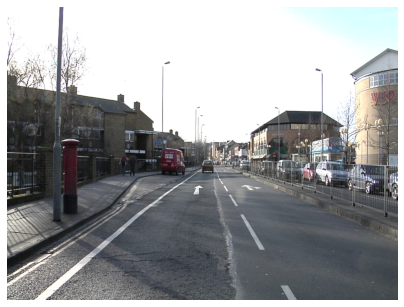

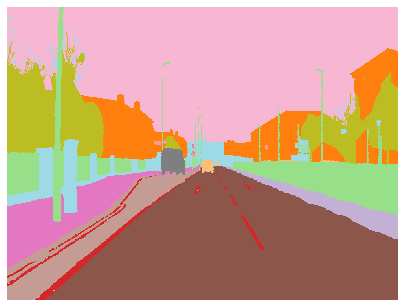

In [0]:
get_y_fn = lambda x: label_path/f'{x.stem}_P{x.suffix}'

img_f = fnames[0]

# Extracting the Image and the Respective Mask
img  = open_image(img_f)
mask = open_mask(get_y_fn(img_f))

img.show(figsize=(7, 7))
mask.show(figsize=(7, 7), alpha=1)

In [0]:
src_size = np.array(mask.shape[1:])
src_size,mask.data

(array([720, 960]), tensor([[[21, 21, 21,  ..., 21, 21, 21],
          [21, 21, 21,  ..., 21, 21, 21],
          [21, 21, 21,  ..., 21, 21, 21],
          ...,
          [18, 18, 18,  ..., 17, 17, 17],
          [18, 18, 18,  ..., 17, 17, 17],
          [18, 18, 18,  ..., 17, 17, 17]]]))

In [0]:
codes = np.loadtxt(path/'codes.txt', dtype=str); codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole',
       'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving', 'ParkingBlock',
       'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel', 'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [0]:
src = (SegmentationItemList.from_folder(img_path)
        .split_by_fname_file(path/'valid.txt')
        .label_from_func(get_y_fn, classes=codes))

src

LabelLists;

Train: LabelList (600 items)
x: SegmentationItemList
Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960)
y: SegmentationLabelList
ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960)
Path: /content/drive/My Drive/Colab Notebooks/fastAI/lesson-3|image-segmentation/database/camvid/images;

Valid: LabelList (101 items)
x: SegmentationItemList
Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960)
y: SegmentationLabelList
ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960)
Path: /content/drive/My Drive/Colab Notebooks/fastAI/lesson-3|image-segmentation/database/camvid/images;

Test: None

In [0]:
SIZE = src_size//2

free_mem = gpu_mem_get_free_no_cache() # Checking how much GPU memory is available

BATCH_SIZE = 8 if free_mem > 8200 else 4
print(f'''GPU Mem Available : {free_mem} MB
Batch Size        : {BATCH_SIZE}''', '\n')


data = (src.transform(get_transforms(), size=SIZE, tfm_y=True)
        .databunch(bs=BATCH_SIZE)
        .normalize(imagenet_stats))

data

GPU Mem Available : 16270 MB
Batch Size        : 8 



ImageDataBunch;

Train: LabelList (600 items)
x: SegmentationItemList
Image (3, 360, 480),Image (3, 360, 480),Image (3, 360, 480),Image (3, 360, 480),Image (3, 360, 480)
y: SegmentationLabelList
ImageSegment (1, 360, 480),ImageSegment (1, 360, 480),ImageSegment (1, 360, 480),ImageSegment (1, 360, 480),ImageSegment (1, 360, 480)
Path: /content/drive/My Drive/Colab Notebooks/fastAI/lesson-3|image-segmentation/database/camvid/images;

Valid: LabelList (101 items)
x: SegmentationItemList
Image (3, 360, 480),Image (3, 360, 480),Image (3, 360, 480),Image (3, 360, 480),Image (3, 360, 480)
y: SegmentationLabelList
ImageSegment (1, 360, 480),ImageSegment (1, 360, 480),ImageSegment (1, 360, 480),ImageSegment (1, 360, 480),ImageSegment (1, 360, 480)
Path: /content/drive/My Drive/Colab Notebooks/fastAI/lesson-3|image-segmentation/database/camvid/images;

Test: None

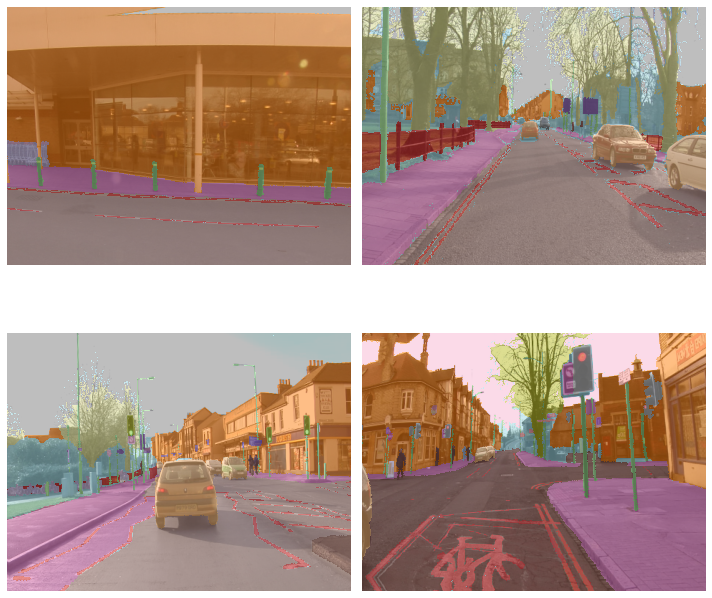

In [0]:
data.show_batch(2, figsize=(10, 10))

# Training

In [0]:
# Creating a Name-Id pair dict
name2id = {name:id for id, name in enumerate(codes)}

# While making the Dataset, the pixels which cannot be recognized, 
# were marked as class VOID. 
void_code = name2id['Void']

# Defining the Accuracy Metrics Function
def accuracy_score(input, target):
  target = target.squeeze(1)
  mask = target != void_code # We need to exclude the VOID Pixels from the acc score
  return (input.argmax(dim=1)[mask]==target[mask]).float().mean()


### Downloading the Pretrained Model

In [0]:
METRICS = accuracy_score
WD      = 1e-2

learner = unet_learner(data, models.resnet34, metrics=METRICS, wd=WD)

NameError: ignored

epoch,train_loss,valid_loss,accuracy_score,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


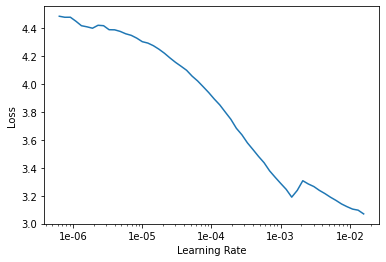

In [0]:
# Computing the Best Learning Rate

lr_find(learner)
learner.recorder.plot()

From the above graph, we can infer that..

The most suitable range of Learning Rate would be (1e-05, 1e-03)

In [0]:
EPOCHS        = 5
LEARNING_RATE = slice(1e-05, 1e-03)

learner.fit_one_cycle(EPOCHS, max_lr=LEARNING_RATE)

epoch,train_loss,valid_loss,accuracy_score,time
0,1.402911,0.729406,0.822768,01:04
1,0.887920,0.557193,0.849776,01:01
2,0.665253,0.559261,0.848966,01:02
3,0.550000,0.419304,0.881727,01:02
4,0.476875,0.394440,0.887263,01:01


(None, None)

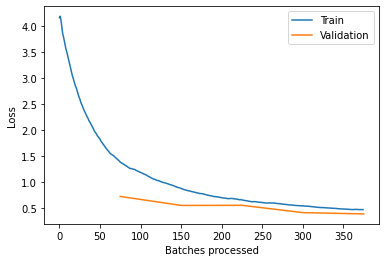

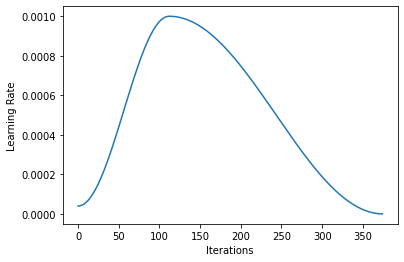

In [0]:
learner.recorder.plot_losses(), learner.recorder.plot_lr()

In [0]:
### Saving the Progress

os.chdir(ROOT+'/database')
learner.save('Stage-1')

### Unfreezing the Model

In [0]:
learner.unfreeze()

epoch,train_loss,valid_loss,accuracy_score,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


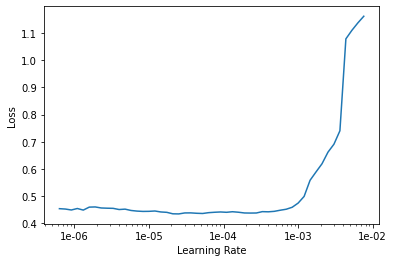

In [0]:
lr_find(learner)
learner.recorder.plot()

In [0]:
EPOCHS        = 5
LEARNING_RATE = slice(2e-06, 2e-05)

learlearnern.fit_one_cycle(EPOCHS, max_lr=LEARNING_RATE)

epoch,train_loss,valid_loss,accuracy_score,time
0,0.450308,0.391517,0.886883,01:01
1,0.440640,0.385180,0.889974,01:01
2,0.424886,0.376769,0.891505,01:02
3,0.418553,0.373811,0.892305,01:02
4,0.413543,0.369421,0.893515,01:01


(None, None)

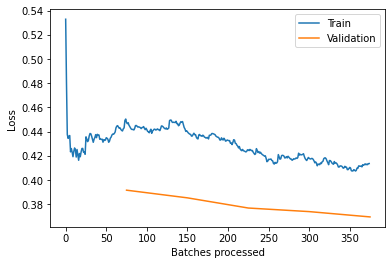

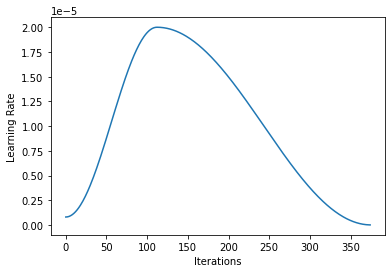

In [0]:
learner.recorder.plot_losses(), learner.recorder.plot_lr()

### Saving the model Progress after Unfreezing

In [0]:
learner.save('Stage-2')

# Going BIG

Now that we've seen that our model is working fine, let's train it again. But this time, we'll not resize the images to their half, instead, we'll use the full resolution image that are given to us.

We started with half size just for experimentation because **the more the size, the more the time taken to train**.

In [0]:
# Destroying the learner.
learner.destroy()

this Learner object self-destroyed - it still exists, but no longer usable


In [0]:
SIZE = src_size

free_mem = gpu_mem_get_free_no_cache() # Checking how much GPU memory is available

BATCH_SIZE = 3 if free_mem > 8200 else 1
print(f'''GPU Mem Available : {free_mem} MB
Batch Size        : {BATCH_SIZE}''', '\n')


METRICS = accuracy_score
WD      = 1e-2

# Creating the DataBunch Object again with the original Size
data = (src.transform(get_transforms(), size=SIZE, tfm_y=True)
        .databunch(bs=BATCH_SIZE)
        .normalize(imagenet_stats))

data

GPU Mem Available : 16270 MB
Batch Size        : 3 



ImageDataBunch;

Train: LabelList (600 items)
x: SegmentationItemList
Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960)
y: SegmentationLabelList
ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960)
Path: /content/drive/My Drive/Colab Notebooks/fastAI/lesson-3|image-segmentation/database/camvid/images;

Valid: LabelList (101 items)
x: SegmentationItemList
Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960)
y: SegmentationLabelList
ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960)
Path: /content/drive/My Drive/Colab Notebooks/fastAI/lesson-3|image-segmentation/database/camvid/images;

Test: None

## Training

In [0]:
# Downloading the Pretrained model
learner = unet_learner(data, models.resnet34, metrics=METRICS, wd=WD)

In [0]:
# Loading the previously trained model
learner.load('Stage-2');

epoch,train_loss,valid_loss,accuracy_score,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


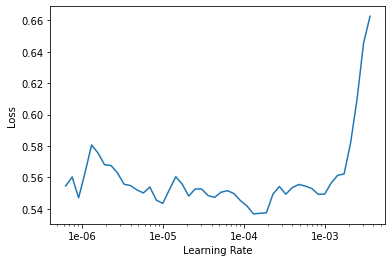

In [0]:
lr_find(learner)
learner.recorder.plot()

In [0]:
EPOCHS        = 5
LEARNING_RATE = 2e-04 # 10 times less that the point where the graph is shooting up

learner.fit_one_cycle(EPOCHS, max_lr=LEARNING_RATE)

epoch,train_loss,valid_loss,accuracy_score,time
0,0.512094,0.403778,0.888022,03:39
1,0.483214,0.356054,0.902142,03:36
2,0.426796,0.330917,0.907619,03:36
3,0.363786,0.290554,0.918089,03:36
4,0.342673,0.286594,0.916015,03:36


(None, None)

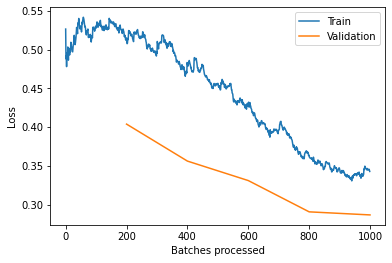

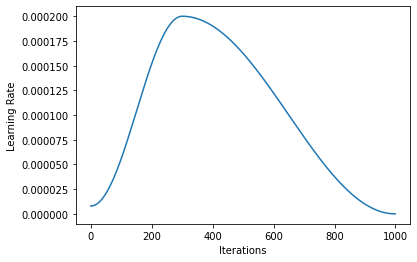

In [0]:
learner.recorder.plot_losses(), learner.recorder.plot_lr()

In [0]:
# Unfezing the model
learner.unfreeze()

epoch,train_loss,valid_loss,accuracy_score,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


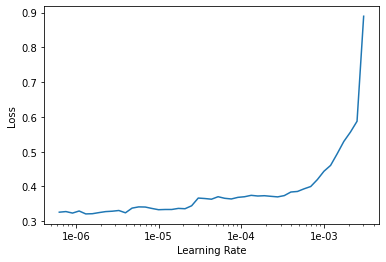

In [0]:
lr_find(learner)
learner.recorder.plot()

In [0]:
EPOCHS        = 5
LEARNING_RATE = 2e-05 # 10 times less that the point where the graph is shooting up

learner.fit_one_cycle(EPOCHS, max_lr=LEARNING_RATE)

epoch,train_loss,valid_loss,accuracy_score,time
0,0.329436,0.295992,0.912585,03:43
1,0.312557,0.288683,0.916387,03:43
2,0.303545,0.279201,0.917149,03:43
3,0.282727,0.276392,0.918555,03:43
4,0.271713,0.270102,0.919879,03:43


In [0]:
learner.save('Stage-2_256')

In [0]:
learn.show_results(rows=3, figsize=(10,10))